### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

<h3> Importing necessary libraries </h3>

In [2]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import BayesianRidge 
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

<h3> Loading the data </h3>

In [4]:
file = pd.read_csv('CE802_P2_Data.csv')

<h3> Data Visualization </h3>

In [5]:
file.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,3.61690,-2.3600,-2671.50,5.1270,-12.6420,0,1.6430,51905.670,-0.8,1747.920,...,5.4380,-2.61500,-4879.68,-11315.46,0,-63.340,-13.0281,-4894.24,45.72,False
1,3.64880,-5.9680,-2826.59,4.6256,-16.3560,0,0.5310,51942.010,-0.8,1496.080,...,5.0960,-2.31149,-4186.38,-12852.96,0,-10.314,-16.2210,-5085.44,50.46,True
2,3.62830,-3.3914,-2490.50,4.3628,-11.2032,1,0.2640,51993.540,-2.8,1523.412,...,2.3652,-2.51310,-4067.28,-11012.16,0,-6.806,-11.7591,-7021.44,NaN,True
3,3.01503,-2.6796,-2472.00,8.9380,-14.5830,1,0.3196,51921.040,-0.8,1506.810,...,4.4080,-2.74650,1352.52,-10297.86,0,-4.670,-11.8110,-4648.76,NaN,True
4,3.60030,-5.0060,-2405.50,6.2800,-11.1243,1,4.0800,51921.238,-0.8,1581.790,...,3.1334,-2.33439,-5095.88,-11527.38,0,-45.920,-11.2635,-4877.20,46.74,True


In [6]:
file.shape

(1000, 21)

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   int64  
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   int64  
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     500 non-null    float64
 20  Class   1000 non-null   bool   
dtypes: bool(1), float64(18), int64(2)
memo

In [8]:
file.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

<h3> Statistical Analysis of the dataset </h3>

In [9]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1000.0,3.938608,0.901204,3.00299,3.261825,3.65725,4.307000,7.555000
F2,1000.0,-3.621917,1.805553,-10.61600,-4.447000,-3.06450,-2.234900,-1.644240
F3,1000.0,-2659.123695,529.018105,-5806.30000,-2864.150000,-2778.45500,-2623.300000,2905.700000
F4,1000.0,5.890532,1.799838,3.94276,4.487150,5.30960,6.856500,12.744000
F5,1000.0,-13.021815,1.819802,-22.12200,-14.027250,-12.60705,-11.570400,-10.740168
F6,1000.0,0.516000,0.499994,0.00000,0.000000,1.00000,1.000000,1.000000
F7,1000.0,1.067873,0.902763,0.11220,0.396475,0.78370,1.464250,4.602000
F8,1000.0,51974.770711,1688.229804,48208.33000,51907.295000,51926.11100,51945.440000,104695.330000
F9,1000.0,-1.814000,1.000402,-2.80000,-2.800000,-2.80000,-0.800000,-0.800000
F10,1000.0,1451.053607,246.538717,-139.08000,1437.582500,1504.89000,1537.961250,3091.920000


In [10]:
file.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20      500
Class      0
dtype: int64

<AxesSubplot:>

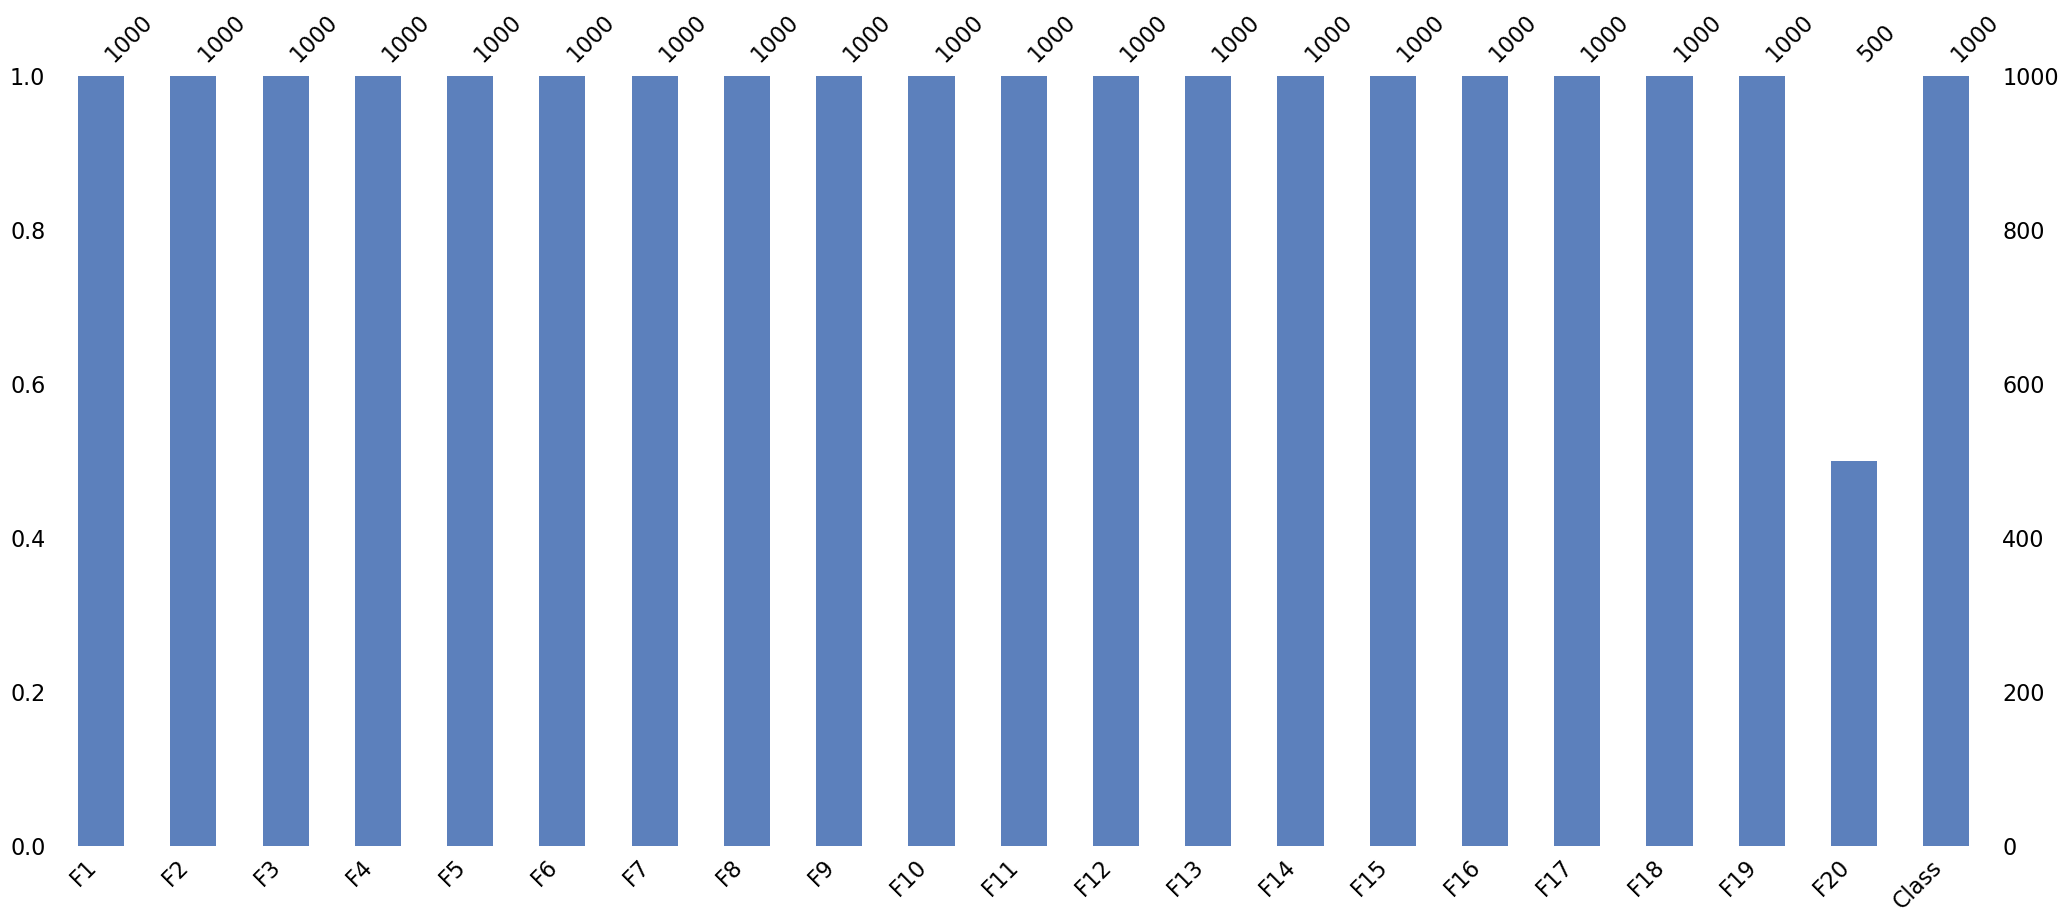

In [11]:
msno.bar(file, color=(92/255, 128/255, 188/255))

 As seen above, the column F20 is missing about 50% of data which isn't useful to be using the missing values column to train and test the models.

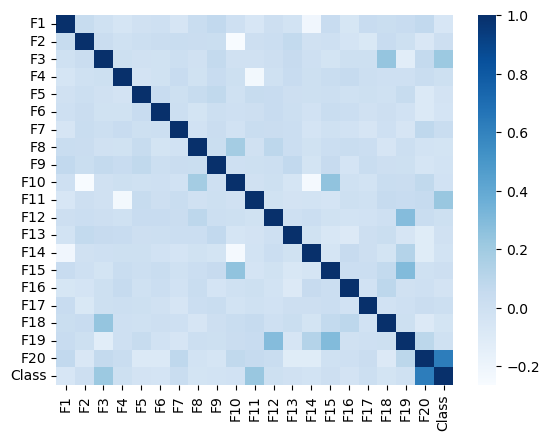

In [12]:
corr = file.corr()
sns.heatmap(corr, annot=False, cmap="Blues")
plt.show()

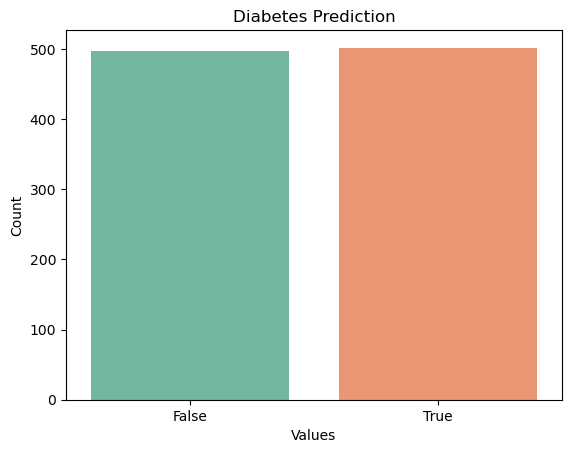

In [13]:
sns.countplot(x='Class', data=file, palette='Set2')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Diabetes Prediction')
plt.show()

<h3> Dropping column Class and defining X Features </h3>

In [14]:
X = file.drop('Class', axis=1)

<h3> Defining target variable </h3>

In [15]:
Y = file['Class']

<h3> Correlation between X features </h3>

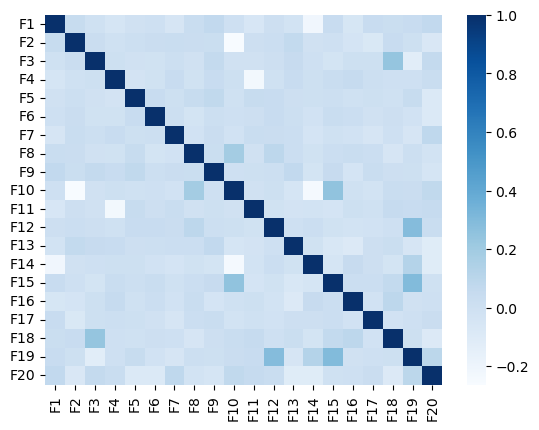

In [16]:
corr = X.corr()
sns.heatmap(corr, cmap="Blues")
plt.show()

<h3> Dropping column which has too many null values </h3>

In [17]:
baselineX = X.dropna(axis=1)

In [18]:
baselineX.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,3.61690,-2.36000,-2671.50,5.1270,-12.6420,0,1.6430,51905.670,-0.8,1747.920,22912.53,5.43800,-2.61500,-4879.68,-11315.46,0,-63.340,-13.0281,-4894.24
1,3.64880,-5.96800,-2826.59,4.6256,-16.3560,0,0.5310,51942.010,-0.8,1496.080,25696.44,5.09600,-2.31149,-4186.38,-12852.96,0,-10.314,-16.2210,-5085.44
2,3.62830,-3.39140,-2490.50,4.3628,-11.2032,1,0.2640,51993.540,-2.8,1523.412,20232.84,2.36520,-2.51310,-4067.28,-11012.16,0,-6.806,-11.7591,-7021.44
3,3.01503,-2.67960,-2472.00,8.9380,-14.5830,1,0.3196,51921.040,-0.8,1506.810,23592.84,4.40800,-2.74650,1352.52,-10297.86,0,-4.670,-11.8110,-4648.76
4,3.60030,-5.00600,-2405.50,6.2800,-11.1243,1,4.0800,51921.238,-0.8,1581.790,24778.74,3.13340,-2.33439,-5095.88,-11527.38,0,-45.920,-11.2635,-4877.20
5,6.59600,-2.62960,-2725.50,4.3992,-11.5251,0,0.4568,51963.620,-0.8,1387.720,22063.44,6.24800,-2.30048,-4226.80,-12340.86,0,-16.458,-14.7090,-4983.04
6,7.08900,-5.68800,-2883.31,6.8580,-13.0461,0,0.2620,51921.150,-2.8,1525.276,23027.52,2.22868,-2.35847,-4274.68,-9447.96,1,-8.408,-13.4490,-2091.44
7,3.15760,-1.65618,-1589.30,5.5288,-11.5179,1,0.8144,51955.580,-2.8,1308.320,24397.44,2.42580,-2.30033,-5450.68,-12202.86,1,-12.318,-10.7589,-8513.44
8,3.39890,-1.72354,-2764.36,10.1540,-12.5022,0,1.1120,51986.070,-0.8,1716.520,22727.94,3.71900,-3.72200,-3306.68,-10919.46,0,-7.984,-17.6280,-4622.90
9,3.14900,-2.11940,-2778.49,4.0732,-11.1105,0,2.2570,51899.690,-0.8,979.120,16157.64,7.27800,-2.57570,-93.48,-11922.66,0,-14.626,-18.4350,-5003.44


<h3> Split the dataset intp train and test </h3>

In [19]:
X_train, X_test, Y_train, y_test = train_test_split(baselineX, Y, test_size=0.2, random_state=50)

<h3> Defining the target variable with binary classification of Class 0 and Class 1 for confusion matrix

In [20]:
target = ['class 0', 'class 1']

<h3> Using StandardScaler for scaling the features to improve the performance of Machine Learning Models 

In [21]:
scaler = StandardScaler()
X_train_scalar = scaler.fit_transform(X_train)
X_test_scalar = scaler.transform(X_test)


<h3> Evaluation using Decision Tree Classifier 

In [22]:
decisionTree = DecisionTreeClassifier(random_state=50)
decisionTree.fit(X_train_scalar, Y_train)

y_pred_decision = decisionTree.predict(X_test_scalar)
accuracy_decision = accuracy_score(y_test, y_pred_decision)
print(accuracy_decision*100)

81.5


<h3> Confusion Matrix of Decision Tree Classifier 

              precision    recall  f1-score   support

     class 0       0.82      0.82      0.82        98
     class 1       0.82      0.82      0.82       102

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



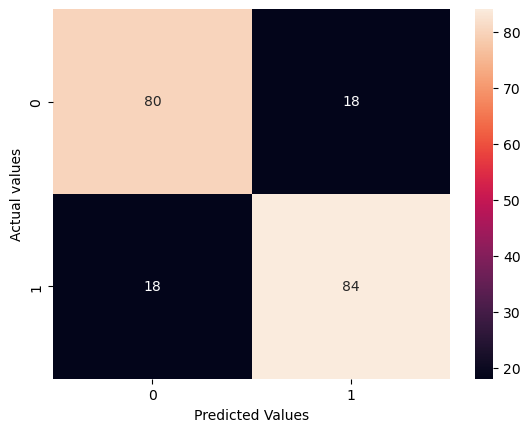

In [23]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train_scalar, Y_train)
dtc_y_pred = dtc.predict(X_test_scalar)
conf_matrix_dtc = confusion_matrix(y_test, dtc_y_pred)
sns.heatmap(conf_matrix_dtc, annot=True, fmt=",d")
print(classification_report(y_test, dtc_y_pred, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

<h3> Logistic Regression Model evaluation

In [24]:
lr_model = LogisticRegression(max_iter=1000, random_state=50)
lr_model.fit(X_train_scalar, Y_train)

lr_y_pred = lr_model.predict(X_test_scalar)
lr_accuracy = accuracy_score(y_test,lr_y_pred)
print(lr_accuracy*100)

67.5


<h3> Confusion Matrix Logistic Regression

              precision    recall  f1-score   support

     class 0       0.65      0.72      0.69        98
     class 1       0.70      0.63      0.66       102

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.68      0.68      0.67       200



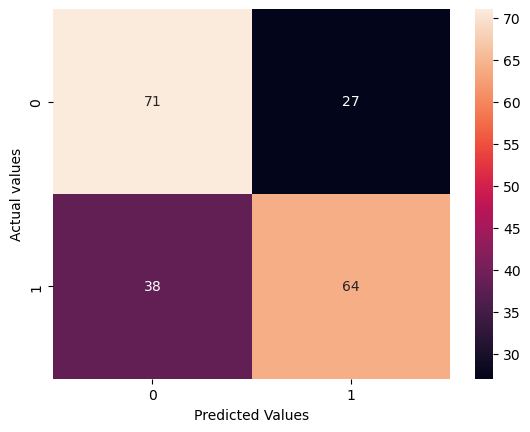

In [25]:
cm_model_lr = LogisticRegression(max_iter=1000, random_state=0)
cm_model_lr.fit(X_train_scalar, Y_train)
cm_lr_y_pred = cm_model_lr.predict(X_test_scalar)
conf_matrix_lr = confusion_matrix(y_test, cm_lr_y_pred)
sns.heatmap(conf_matrix_lr, annot=True, fmt=",d")
print(classification_report(y_test, cm_lr_y_pred, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

<h3> Support Vector Machine Evaluation

In [26]:
svm = SVC(random_state=50)
svm.fit(X_train_scalar, Y_train)

y_pred_svm = svm.predict(X_test_scalar)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(acc_svm*100)

72.0


<h3> Support Vector Machine Confusion Matrix 

              precision    recall  f1-score   support

     class 0       0.69      0.77      0.73        98
     class 1       0.75      0.68      0.71       102

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



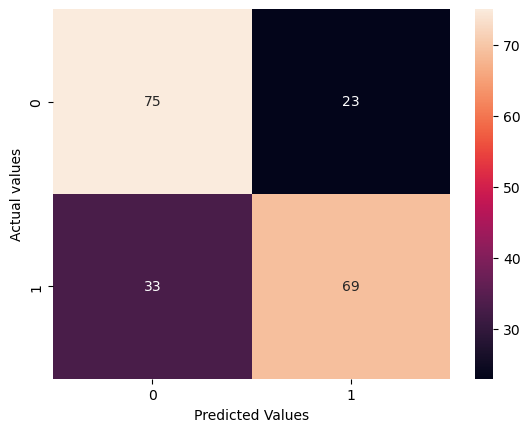

In [27]:
svm_model_cm = SVC()
svm_model_cm.fit(X_train_scalar,Y_train)
svm_y_pred_cm = svm_model_cm.predict(X_test_scalar)
conf_matrix_svm = confusion_matrix(y_test, svm_y_pred_cm)
sns.heatmap(conf_matrix_svm, annot=True, fmt=",d")
print(classification_report(y_test, svm_y_pred_cm, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

<h3> Random Forest Classifier Evaluation

In [28]:
randomClassifier = RandomForestClassifier(random_state=50)
randomClassifier.fit(X_train_scalar, Y_train)

y_pred_random = randomClassifier.predict(X_test_scalar)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(accuracy_random*100)

82.0


<h3> Random Forest Classifier Confusion Matrix

              precision    recall  f1-score   support

     class 0       0.83      0.84      0.83        98
     class 1       0.84      0.83      0.84       102

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200



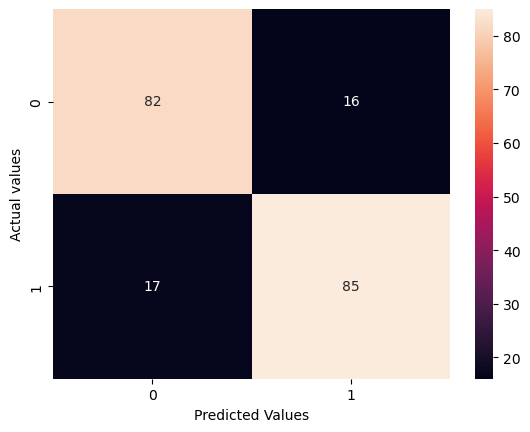

In [29]:
rfc_model_cm = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rfc_model_cm.fit(X_train_scalar,Y_train)
rfc_y_pred_cm = rfc_model_cm.predict(X_test_scalar)
conf_matrix_rfc = confusion_matrix(y_test, rfc_y_pred_cm)
sns.heatmap(conf_matrix_rfc, annot=True, fmt=",d")
print(classification_report(y_test, rfc_y_pred_cm, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

<h3> Bar plot to visualise the best predicted model

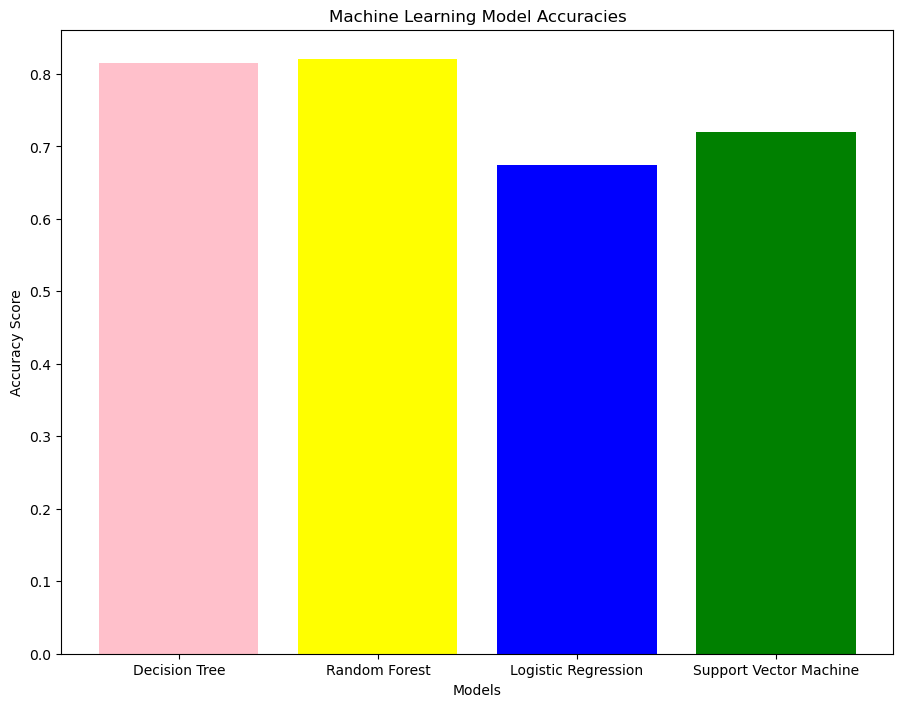

In [30]:
ml_models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Support Vector Machine']
accuracyScores = [accuracy_decision, accuracy_random, lr_accuracy, acc_svm]

colors = ['pink', 'yellow', 'blue', 'green']
fig = plt.figure()
ax = fig.add_axes([0,0,1.3,1.3])
ax.set_title('Machine Learning Model Accuracies')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.bar(ml_models,accuracyScores, color=colors)
plt.show()

<h3> Plotting histogram to column F20 to check the distribution of NaN values 

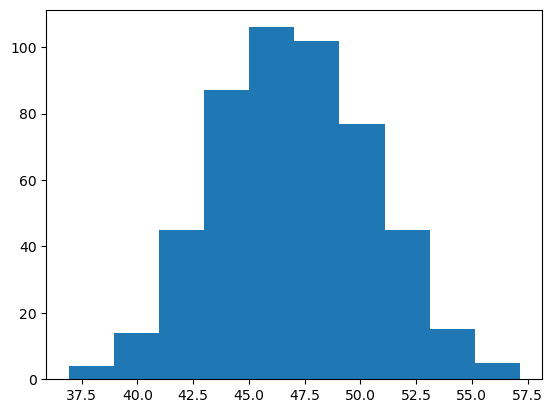

In [31]:
plot = plt.hist(file['F20'], bins=10)

<h3> Creating a copy of the file to tackle with the missing values of column F20

In [32]:
meanfile_copy = pd.read_csv('CE802_P2_Data.csv')
meanfile_copy.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,3.61690,-2.3600,-2671.50,5.1270,-12.6420,0,1.6430,51905.670,-0.8,1747.920,...,5.4380,-2.61500,-4879.68,-11315.46,0,-63.340,-13.0281,-4894.24,45.72,False
1,3.64880,-5.9680,-2826.59,4.6256,-16.3560,0,0.5310,51942.010,-0.8,1496.080,...,5.0960,-2.31149,-4186.38,-12852.96,0,-10.314,-16.2210,-5085.44,50.46,True
2,3.62830,-3.3914,-2490.50,4.3628,-11.2032,1,0.2640,51993.540,-2.8,1523.412,...,2.3652,-2.51310,-4067.28,-11012.16,0,-6.806,-11.7591,-7021.44,NaN,True
3,3.01503,-2.6796,-2472.00,8.9380,-14.5830,1,0.3196,51921.040,-0.8,1506.810,...,4.4080,-2.74650,1352.52,-10297.86,0,-4.670,-11.8110,-4648.76,NaN,True
4,3.60030,-5.0060,-2405.50,6.2800,-11.1243,1,4.0800,51921.238,-0.8,1581.790,...,3.1334,-2.33439,-5095.88,-11527.38,0,-45.920,-11.2635,-4877.20,46.74,True


Filling missing values of the column using method Mean and plotting histogram to check the distrubtion after filling the missing values 

In [33]:
meanfile_copy['F20'].fillna(value = meanfile_copy['F20'].mean(), inplace=True)

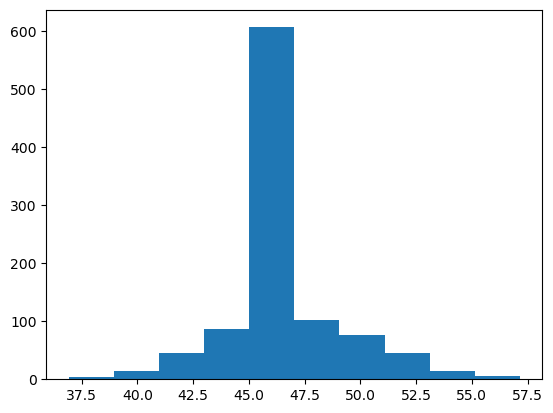

In [34]:
histPlot = plt.hist(meanfile_copy['F20'], bins=10)

The distribution of data using the fillna method of mean is completely different from the original column distribution F20. Hence this method can't be used

In [35]:
median_fileCopy = pd.read_csv('CE802_P2_Data.csv')

<h3> Using Fillna Median method to tackle with missing values of column F20 and plotting a histogram to check the distribution of data

In [36]:
median_fileCopy['F20'].fillna(value = median_fileCopy['F20'].median(), inplace=True)
median_fileCopy.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,3.61690,-2.3600,-2671.50,5.1270,-12.6420,0,1.6430,51905.670,-0.8,1747.920,...,5.4380,-2.61500,-4879.68,-11315.46,0,-63.340,-13.0281,-4894.24,45.72,False
1,3.64880,-5.9680,-2826.59,4.6256,-16.3560,0,0.5310,51942.010,-0.8,1496.080,...,5.0960,-2.31149,-4186.38,-12852.96,0,-10.314,-16.2210,-5085.44,50.46,True
2,3.62830,-3.3914,-2490.50,4.3628,-11.2032,1,0.2640,51993.540,-2.8,1523.412,...,2.3652,-2.51310,-4067.28,-11012.16,0,-6.806,-11.7591,-7021.44,46.95,True
3,3.01503,-2.6796,-2472.00,8.9380,-14.5830,1,0.3196,51921.040,-0.8,1506.810,...,4.4080,-2.74650,1352.52,-10297.86,0,-4.670,-11.8110,-4648.76,46.95,True
4,3.60030,-5.0060,-2405.50,6.2800,-11.1243,1,4.0800,51921.238,-0.8,1581.790,...,3.1334,-2.33439,-5095.88,-11527.38,0,-45.920,-11.2635,-4877.20,46.74,True


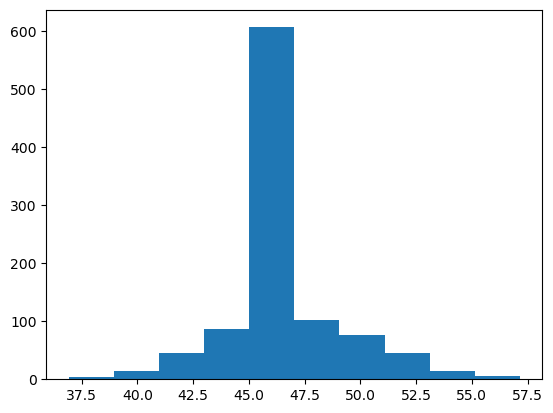

In [37]:
histPlot = plt.hist(median_fileCopy['F20'], bins=10)

The distribution of data using the fillna method of mean is completely different from the original column distribution F20. Hence this method also cannot be used

<h3> Using IterativeImputer and plotting a histogram to tackle with NaN values of F20 column

In [38]:
iterative_file_copy = pd.read_csv("CE802_P2_Data.csv")

In [39]:
imputer = IterativeImputer(estimator=BayesianRidge())
new_X = iterative_file_copy.drop('Class', axis=1)
new_X['F20'] = imputer.fit_transform(new_X['F20'].values.reshape(-1,1))

print(new_X.shape)
new_X.head()

(1000, 20)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
0,3.61690,-2.3600,-2671.50,5.1270,-12.6420,0,1.6430,51905.670,-0.8,1747.920,22912.53,5.4380,-2.61500,-4879.68,-11315.46,0,-63.340,-13.0281,-4894.24,45.7200
1,3.64880,-5.9680,-2826.59,4.6256,-16.3560,0,0.5310,51942.010,-0.8,1496.080,25696.44,5.0960,-2.31149,-4186.38,-12852.96,0,-10.314,-16.2210,-5085.44,50.4600
2,3.62830,-3.3914,-2490.50,4.3628,-11.2032,1,0.2640,51993.540,-2.8,1523.412,20232.84,2.3652,-2.51310,-4067.28,-11012.16,0,-6.806,-11.7591,-7021.44,47.0103
3,3.01503,-2.6796,-2472.00,8.9380,-14.5830,1,0.3196,51921.040,-0.8,1506.810,23592.84,4.4080,-2.74650,1352.52,-10297.86,0,-4.670,-11.8110,-4648.76,47.0103
4,3.60030,-5.0060,-2405.50,6.2800,-11.1243,1,4.0800,51921.238,-0.8,1581.790,24778.74,3.1334,-2.33439,-5095.88,-11527.38,0,-45.920,-11.2635,-4877.20,46.7400


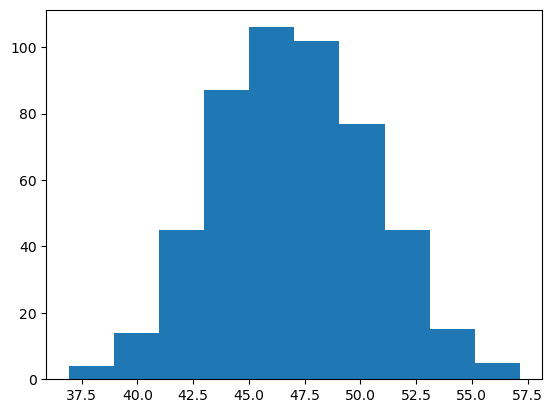

In [40]:
histPlot = plt.hist(iterative_file_copy['F20'], bins=10)

Using Iterative Imputer the missing values of column is filled and is distributed as similar to the original F20 column. Hence using this method.

<h3> Identify target variable

In [41]:
iterative_y = iterative_file_copy['Class']

<h3> Split dataset into train and test

In [42]:
iter_X_train, iter_X_test, iter_Y_train, iter_y_test = train_test_split(new_X, iterative_y, test_size=0.2, random_state=50)

iter_X_train.shape

(800, 20)

<h3>Scaling the features using StandardScaler method

In [43]:
iterative_scaler = StandardScaler()

iter_x_train_scaler = iterative_scaler.fit_transform(iter_X_train)
iter_x_test_scaler = iterative_scaler.transform(iter_X_test)

print(iter_x_train_scaler[0:2])
print(iter_x_train_scaler.shape)
print(iter_x_test_scaler.shape)

[[ 0.44019857  0.00433534 -0.39927998 -0.65725657  0.28049626  0.95118973
  -0.59639453  0.00492955 -0.95836592 -0.0979606   0.63225783 -1.01691198
   0.25296601 -0.08602667 -0.7123671  -1.01257911  0.96857812  0.22119079
  -1.00279635 -2.70672314]
 [-0.96255709 -1.06260564 -0.23721085  1.59612486  0.93516178 -1.05131497
   1.56526495 -0.03059714  1.04344279  0.31070237 -0.33940463 -1.05775893
   0.64212396  1.67300574  0.09503318 -1.01257911  0.04506473 -1.64155556
   0.4887051  -0.01462778]]
(800, 20)
(200, 20)


<h3> Defining classes of target variable to use in confusion matrix of all models

In [44]:
target = ['class 0', 'class 1']

<h3> Evalaution of Decision Tree Classifier

In [45]:
dtc_impute = DecisionTreeClassifier(random_state=50)
dtc_impute.fit(iter_x_train_scaler, iter_Y_train)

y_pred_dtc_impute = dtc_impute.predict(iter_x_test_scaler)
acc_dtc_impute = accuracy_score(iter_y_test, y_pred_dtc_impute)
print(acc_dtc_impute*100)

81.5


<h3> Finding the most importance feature column after evaluation

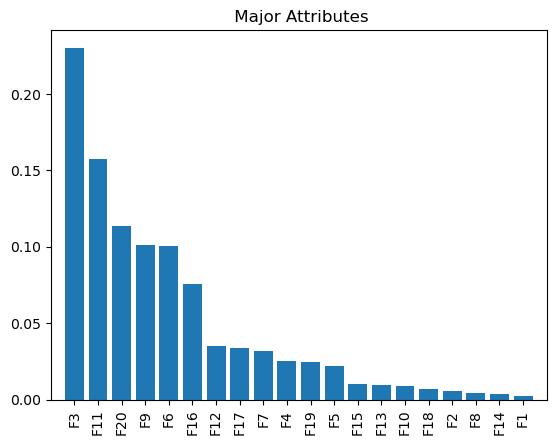

In [46]:
dtc_importance = dtc_impute.feature_importances_
names = iterative_file_copy.columns[:-1]
indice = dtc_importance.argsort()[::-1]
sorted_names = [names[i] for i in indice]
plt.figure()
plt.title(" Major Attributes")
plt.bar(range(iter_x_train_scaler.shape[1]), dtc_importance[indice])
plt.xticks(range(iter_x_train_scaler.shape[1]), sorted_names, rotation = 'vertical')
plt.xlim([-1, iter_x_train_scaler.shape[1]])
plt.show()

<H3> Decison Tree Classifier Confusion Matrix

              precision    recall  f1-score   support

     class 0       0.77      0.81      0.79        98
     class 1       0.80      0.76      0.78       102

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



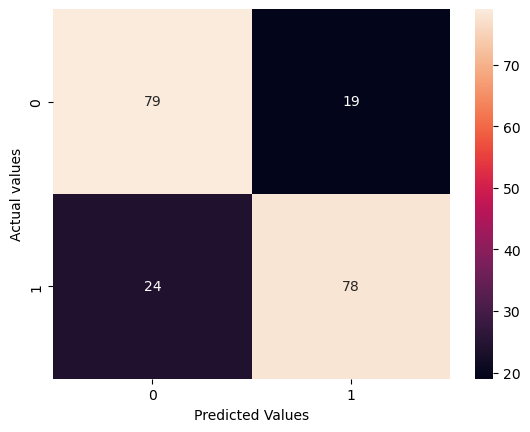

In [47]:
dtc_impute_cm = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc_impute_cm.fit(iter_x_train_scaler, iter_Y_train)
dtc_y_pred_cm = dtc_impute_cm.predict(iter_x_test_scaler)
conf_matrix_dtc_impute = confusion_matrix(iter_y_test, dtc_y_pred_cm)
sns.heatmap(conf_matrix_dtc_impute, annot=True, fmt=",d")
print(classification_report(iter_y_test, dtc_y_pred_cm, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

<H3> Evaluation using Logistic Regression Model

In [48]:
lr_model_impute = LogisticRegression(max_iter=1000, random_state=50)
lr_model_impute.fit(iter_x_train_scaler, iter_Y_train)

lr_y_pred_impute = lr_model_impute.predict(iter_x_test_scaler)
lr_accuracy_impute = accuracy_score(iter_y_test, lr_y_pred_impute)
print(lr_accuracy_impute*100)


76.0


<H3> Finding the most import feature column of dataset 

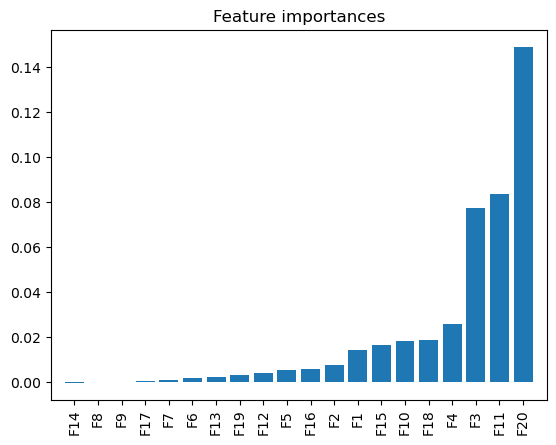

In [49]:
result = permutation_importance(lr_model_impute, iter_x_train_scaler, iter_Y_train, n_repeats=10, random_state=0)
feature_importance = result.importances_mean
indice = np.argsort(feature_importance)[::-1]

featureNames = file.columns[:-1]
indice = feature_importance.argsort()[::1]
sortedNames = [featureNames[i] for i in indice]
plt.figure()
plt.title("Feature importances")
plt.bar(range(iter_x_train_scaler.shape[1]), feature_importance[indice])
plt.xticks(range(iter_x_train_scaler.shape[1]), sortedNames, rotation='vertical')
plt.xlim([-1, iter_x_train_scaler.shape[1]])
plt.show()

<H3> Logistic Regression Confusion Matrix

              precision    recall  f1-score   support

     class 0       0.74      0.80      0.76        98
     class 1       0.79      0.73      0.76       102

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



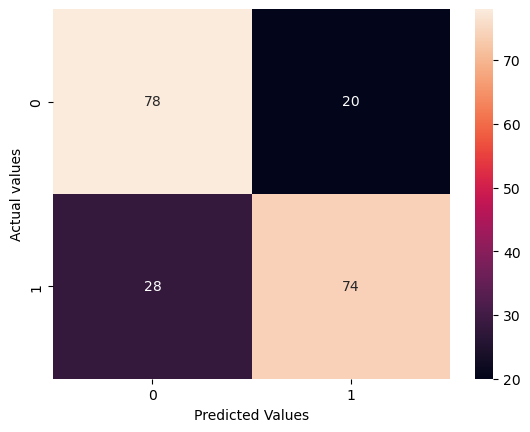

In [50]:
model_lr_cm = LogisticRegression(max_iter=1000, random_state=0)
model_lr_cm.fit(iter_x_train_scaler, iter_Y_train)
lr_y_pred_cm = model_lr_cm.predict(iter_x_test_scaler)
conf_matrix_lr_impute = confusion_matrix(iter_y_test, lr_y_pred_cm)
sns.heatmap(conf_matrix_lr_impute, annot=True, fmt=",d")
print(classification_report(iter_y_test, lr_y_pred_cm, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

<H3> Evalaution using Random Forest Classifier

In [51]:

imputed_rfc = RandomForestClassifier(random_state=50)
imputed_rfc.fit(iter_x_train_scaler, iter_Y_train)

imputed_rfc_y_pred = imputed_rfc.predict(iter_x_test_scaler)
imputed_rfc_accuracy = accuracy_score(iter_y_test, imputed_rfc_y_pred)
print(imputed_rfc_accuracy*100)

86.5


<H3>Plotting the columns based on the importance usinh feature importance method

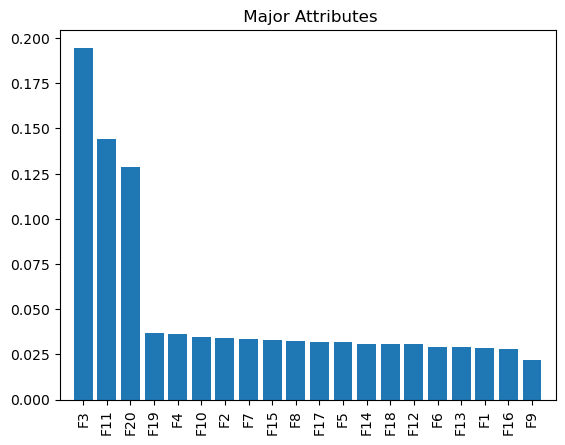

In [52]:
rfc_importance = imputed_rfc.feature_importances_
names = iterative_file_copy.columns[:-1]
indice = rfc_importance.argsort()[::-1]
sorted_names = [names[i] for i in indice]
plt.figure()
plt.title(" Major Attributes")
plt.bar(range(iter_x_train_scaler.shape[1]), rfc_importance[indice])
plt.xticks(range(iter_x_train_scaler.shape[1]), sorted_names, rotation = 'vertical')
plt.xlim([-1, iter_x_train_scaler.shape[1]])
plt.show()

<H3> Random Forest Classifier Confusion Matrix

              precision    recall  f1-score   support

     class 0       0.84      0.79      0.81        98
     class 1       0.81      0.85      0.83       102

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



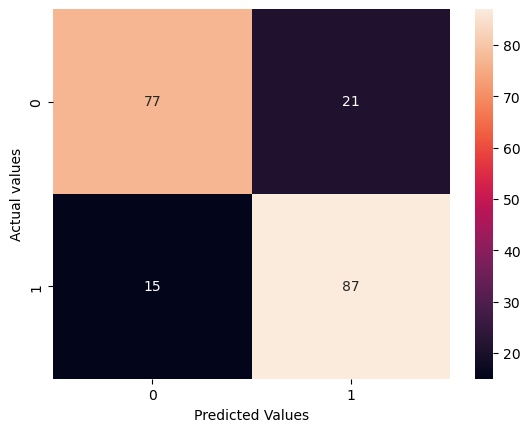

In [53]:
imputed_rfc_cm = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
imputed_rfc_cm.fit(iter_x_train_scaler, iter_Y_train)
rfc_y_pred_cm = imputed_rfc_cm.predict(iter_x_test_scaler)
conf_matrix_rfc_impute = confusion_matrix(iter_y_test, rfc_y_pred_cm)
sns.heatmap(conf_matrix_rfc_impute, annot=True, fmt=",d")
print(classification_report(iter_y_test, rfc_y_pred_cm, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

<H3> Evalaution using Support Vector Machines (SVM)

In [54]:
imputed_svm = SVC(random_state=50)
imputed_svm.fit(iter_x_train_scaler, iter_Y_train)

imputed_svm_y_pred = imputed_svm.predict(iter_x_test_scaler)
imputed_svm_accuracy = accuracy_score(iter_y_test, imputed_svm_y_pred)
print(imputed_svm_accuracy*100)

77.0


<H3> Plotting feature importance graph

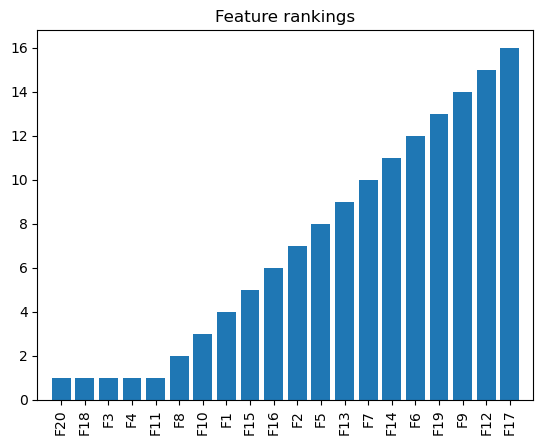

In [55]:
svm_plot = SVC(kernel='linear', C=1, random_state=42)
svm_plot.fit(iter_x_train_scaler, iter_Y_train)

rfe = RFE(svm_plot, n_features_to_select=5, step=1)
rfe.fit(iter_x_train_scaler, iter_Y_train)

ranking = rfe.ranking_

names = iterative_file_copy.columns[:-1]

indice = ranking.argsort()

sorted_names = [names[i] for i in indice]

plt.figure()
plt.title("Feature rankings")
plt.bar(range(iter_x_train_scaler.shape[1]), ranking[indice])
plt.xticks(range(iter_x_train_scaler.shape[1]), sorted_names, rotation='vertical')
plt.xlim([-1, iter_x_train_scaler.shape[1]])
plt.show()

<h3> Support Vector Machine Confusion Matrix

              precision    recall  f1-score   support

     class 0       0.74      0.82      0.78        98
     class 1       0.80      0.73      0.76       102

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



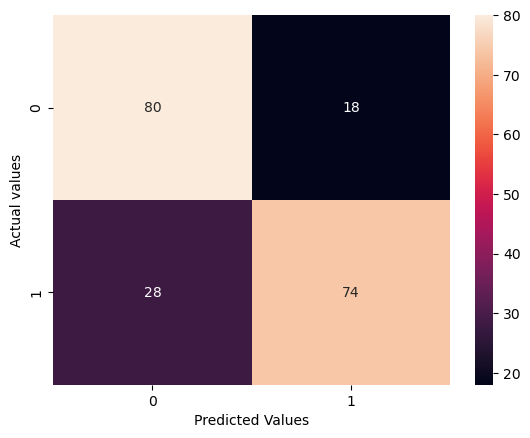

In [56]:
imputed_svm_cm = SVC()
imputed_svm_cm.fit(iter_x_train_scaler, iter_Y_train)
svm_y_pred_cm = imputed_svm_cm.predict(iter_x_test_scaler)
conf_matrix_svm_impute = confusion_matrix(iter_y_test, svm_y_pred_cm)
sns.heatmap(conf_matrix_svm_impute, annot=True, fmt=",d")
print(classification_report(iter_y_test, svm_y_pred_cm, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

<h3> Bar plot to find out the best machine learning model to be used after imputation

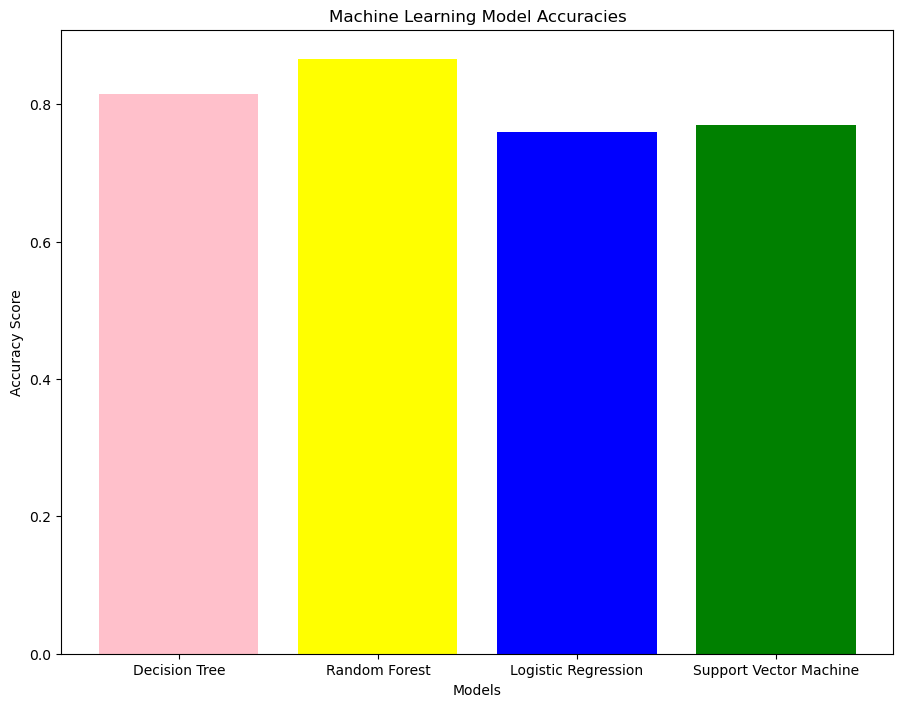

In [57]:
ml_models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Support Vector Machine']
accuracyScores = [acc_dtc_impute, imputed_rfc_accuracy, lr_accuracy_impute, imputed_svm_accuracy]

colors = ['pink', 'yellow', 'blue', 'green']
fig = plt.figure()
ax = fig.add_axes([0,0,1.3,1.3])
ax.set_title('Machine Learning Model Accuracies')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.bar(ml_models,accuracyScores, color=colors)
plt.show()

<H3> Comparison of predictions between models before and after imputation

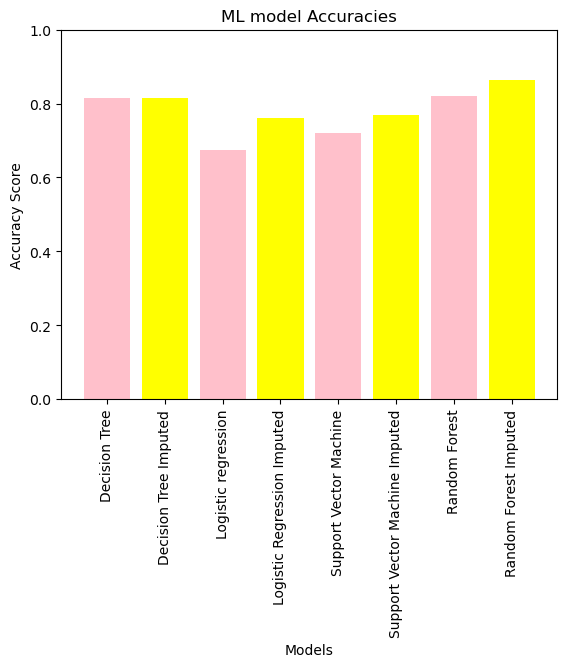

In [59]:
MachineLearningAlgorithms = ['Decision Tree', 'Decision Tree Imputed', 'Logistic regression', 'Logistic Regression Imputed', 'Support Vector Machine', 'Support Vector Machine Imputed', 'Random Forest', 'Random Forest Imputed',]
colors = ['pink','yellow','pink','yellow','pink','yellow']
accuracies = [accuracy_decision, acc_dtc_impute, lr_accuracy, lr_accuracy_impute, acc_svm, imputed_svm_accuracy, accuracy_random, imputed_rfc_accuracy]

plt.bar(MachineLearningAlgorithms, accuracies, color=colors)
plt.title('ML model Accuracies')
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim((0, 1))
plt.show()

### Part B

In [60]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

test_data['F20'] = pd.DataFrame(imputer.fit_transform(test_data['F20'].values.reshape(-1,1)))
scaled_data = iterative_scaler.fit_transform(test_data)

predicted = imputed_rfc.predict(scaled_data) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])